In [93]:
%pip install osmnx
%pip install osm2geojson
import pandas as pd
import osmnx as ox
import geopandas as gpd
import osm2geojson
import codecs
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [94]:
#Import data from maps xml file
graph = ox.graph_from_xml('data/map.osm')
geometries = ox.geometries_from_xml('data/map.osm')
geometries


name name:da name:ja name:ko name:nn  \
element_type osmid                                                           
node         27323968                 Lund    Lund     ルンド      룬드    Lund   
             27368367                  NaN     NaN     NaN     NaN     NaN   
             27368371               Lund C     NaN     NaN     NaN     NaN   
             27368381  Lund centralstation     NaN     NaN     NaN     NaN   
             27368503                  NaN     NaN     NaN     NaN     NaN   
...                                    ...     ...     ...     ...     ...   
relation     5150208                   NaN     NaN     NaN     NaN     NaN   
             5555489                   NaN     NaN     NaN     NaN     NaN   
             5555490                   NaN     NaN     NaN     NaN     NaN   
             8466886            Parentesen     NaN     NaN     NaN     NaN   
             15021533       Järnåkraskolan     NaN     NaN     NaN     NaN   

                      name:no name:ru name:sv name:yue name:zh place  \
element_type osmid                                                     
node         27323968    Lund    Лунд    Lund       隆德      隆德  town   
             27368367     NaN     NaN     NaN      NaN     NaN   NaN   
             27368371     NaN     NaN     NaN      NaN     NaN   NaN   
             27368381     NaN     NaN     NaN      NaN     NaN   NaN   
             27368503     NaN     NaN     NaN      NaN     NaN   NaN   
...                       ...     ...     ...      ...     ...   ...   
relation     5150208      NaN     NaN     NaN      NaN     NaN   NaN   
             5555489      NaN     NaN     NaN      NaN     NaN   NaN   
             5555490      NaN     NaN     NaN      NaN     NaN   NaN   
             8466886      NaN     NaN     NaN      NaN     NaN   NaN   
             15021533     NaN     NaN     NaN      NaN     NaN   NaN   

                      population ref:se:pts:postort ref:se:scb   wikidata  \
element_type osmid                                                          
node         27323968      82800               LUND       3584      Q2167   
             27368367        NaN                NaN        NaN        NaN   
             27368371        NaN                NaN        NaN        NaN   
             27368381        NaN                NaN        NaN        NaN   
             27368503        NaN                NaN        NaN        NaN   
...                          ...                ...        ...        ...   
relation     5150208         NaN                NaN        NaN        NaN   
             5555489         NaN                NaN        NaN        NaN   
             5555490         NaN                NaN        NaN        NaN   
             8466886         NaN                NaN        NaN  Q19899755   
             15021533        NaN                NaN        NaN        NaN   

                      wikipedia  \
element_type osmid                
node         27323968   sv:Lund   
             27368367       NaN   
             27368371       NaN   
             27368381       NaN   
             27368503       NaN   
...                         ...   
relation     5150208        NaN   
             5555489        NaN   
             5555490        NaN   
             8466886        NaN   
             15021533       NaN   

                                                                geometry  \
element_type osmid                                                         
node         27323968                          POINT (13.19294 55.70293)   
             27368367                          POINT (13.18776 55.70368)   
             27368371                          POINT (13.18776 55.70444)   
             27368381                          POINT (13.18635 55.70677)   
             27368503                          POINT (13.18752 55.69102)   
...                                                                  ...   
relation     5150208

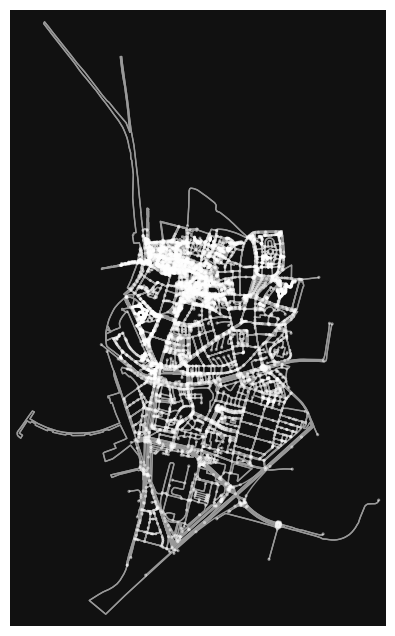

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [95]:
ox.plot_graph(graph,node_alpha=0.5,node_size=5)

In [106]:
multipolygon = geometries[geometries['type'] == 'multipolygon']['geometry']
pd.set_option('display.max_columns', 500)
df = multipolygon;
df

element_type  osmid   
relation      1308229     POLYGON ((13.19914 55.70293, 13.19915 55.70279...
              1323075     POLYGON ((13.20153 55.69585, 13.20160 55.69570...
              1323396     POLYGON ((13.19407 55.69392, 13.19407 55.69390...
              1364131     POLYGON ((13.19541 55.70219, 13.19539 55.70234...
              1401538     MULTIPOLYGON (((13.18955 55.70445, 13.18958 55...
              1423213     POLYGON ((13.18737 55.70247, 13.18748 55.70254...
              1423278     POLYGON ((13.18854 55.70327, 13.18860 55.70324...
              1686288     POLYGON ((13.19601 55.70407, 13.19606 55.70412...
              1686289     POLYGON ((13.19534 55.70370, 13.19514 55.70376...
              1690170     POLYGON ((13.19659 55.70107, 13.19657 55.70112...
              1746216     POLYGON ((13.18841 55.68854, 13.18868 55.68850...
              1998200     POLYGON ((13.19276 55.70397, 13.19282 55.70396...
              1998201     POLYGON ((13.19275 55.70435, 13.19275 5

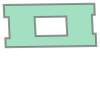

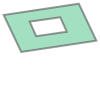

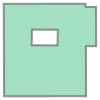

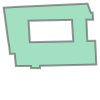

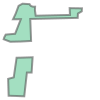

In [110]:
df.iloc[4]
#gpd.GeoSeries([polydiff])
for row in df.values[0:5]:  
    display(row)


<GeometryArray>
[<POLYGON ((13.199 55.703, 13.199 55.703, 13.199 55.703, 13.199 55.703, 13.19...>,
 <POLYGON ((13.202 55.696, 13.202 55.696, 13.202 55.696, 13.201 55.696, 13.20...>,
 <POLYGON ((13.194 55.694, 13.194 55.694, 13.194 55.694, 13.194 55.694, 13.19...>,
 <POLYGON ((13.195 55.702, 13.195 55.702, 13.195 55.702, 13.196 55.702, 13.19...>,
 <MULTIPOLYGON (((13.19 55.704, 13.19 55.704, 13.19 55.704, 13.19 55.704, 13....>,
 <POLYGON ((13.187 55.702, 13.187 55.703, 13.188 55.702, 13.188 55.702, 13.18...>,
 <POLYGON ((13.189 55.703, 13.189 55.703, 13.189 55.703, 13.189 55.703, 13.18...>,
 <POLYGON ((13.196 55.704, 13.196 55.704, 13.196 55.704, 13.196 55.704, 13.19...>,
 <POLYGON ((13.195 55.704, 13.195 55.704, 13.195 55.704, 13.195 55.704, 13.19...>,
 <POLYGON ((13.197 55.701, 13.197 55.701, 13.196 55.701, 13.196 55.701, 13.19...>,
 <POLYGON ((13.188 55.689, 13.189 55.689, 13.189 55.689, 13.189 55.689, 13.18...>,
 <POLYGON ((13.193 55.704, 13.193 55.704, 13.193 55.704, 13.193 55.704,

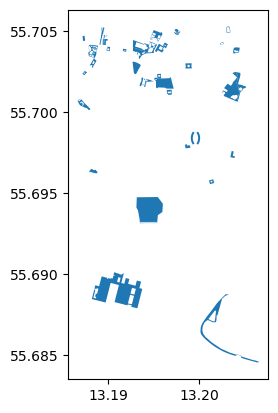

In [111]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
print(df.values)
myPoly = gpd.GeoSeries(df.values)
myPoly.plot()
plt.show()
